In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import platform

from M3RefTracking import M3RefTracking
from DetectorConfigLoader import DetectorConfigLoader
from Detector import Detector
from DreamDetector import DreamDetector
from DreamData import DreamData


In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
else:
    raise OSError('Unknown platform')

In [3]:
run_name = 'drift_scan_11-13-24'
run_dir = f'{base_dir}{run_name}/'

detector = 'urw_inter'
drift_vs = [800, 750, 700, 650, 600, 550, 500, 450, 400, 350, 300, 250, 200]

# file_nums = list(range(0, 1))
file_nums = 'all'

chunk_size = 5  # Number of files to process at once

run_json_path = f'{run_dir}run_config.json'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.29it/s]


Read in data shape: (11004, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 93.63it/s]


Fitting time: 0.23528027534484863 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


Read in data shape: (5665, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 211.10it/s]


Fitting time: 0.12413907051086426 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.51it/s]


Read in data shape: (9233, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 104.41it/s]


Fitting time: 0.20296049118041992 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.50it/s]


Read in data shape: (5691, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 258.39it/s]


Fitting time: 0.1211402416229248 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


Read in data shape: (11214, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 99.56it/s]


Fitting time: 0.22577381134033203 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.50it/s]


Read in data shape: (5734, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 269.99it/s]


Fitting time: 0.12561988830566406 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.18it/s]


Read in data shape: (11307, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 72.36it/s]


Fitting time: 0.26185035705566406 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.51it/s]


Read in data shape: (5645, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 256.17it/s]


Fitting time: 0.1246194839477539 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.20it/s]


Read in data shape: (11171, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 79.27it/s]


Fitting time: 0.26129841804504395 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.46it/s]


Read in data shape: (5775, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 274.84it/s]


Fitting time: 0.12365150451660156 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.11it/s]


Read in data shape: (11315, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 89.45it/s]


Fitting time: 0.24180269241333008 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


Read in data shape: (5917, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 193.30it/s]


Fitting time: 0.15867996215820312 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.05it/s]


Read in data shape: (11376, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 88.65it/s]


Fitting time: 0.24026989936828613 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


Read in data shape: (6058, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 249.78it/s]


Fitting time: 0.13115286827087402 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.05it/s]


Read in data shape: (11455, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 80.12it/s]


Fitting time: 0.24980568885803223 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Read in data shape: (6327, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 254.02it/s]


Fitting time: 0.1416609287261963 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.17it/s]


Read in data shape: (11393, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 82.93it/s]


Fitting time: 0.236922025680542 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


Read in data shape: (6331, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 232.24it/s]


Fitting time: 0.14966845512390137 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.16it/s]


Read in data shape: (11513, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 88.84it/s]


Fitting time: 0.24591565132141113 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.46it/s]


Read in data shape: (6142, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 190.87it/s]


Fitting time: 0.13263964653015137 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


Read in data shape: (11556, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 82.78it/s]


Fitting time: 0.2432713508605957 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Read in data shape: (6193, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 228.72it/s]


Fitting time: 0.13465476036071777 s
Processed chunk 2/2
Getting hits...


C:\Users\Dylan\PycharmProjects\saclay_micromegas\DreamData.py:501: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


Read in data shape: (10739, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 86.60it/s]


Fitting time: 0.24982428550720215 s
Processed chunk 1/2


100%|██████████| 2/2 [00:01<00:00,  1.74it/s]


Read in data shape: (4466, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 416.31it/s]


Fitting time: 0.10159945487976074 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.32it/s]


Read in data shape: (10827, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 95.42it/s]


Fitting time: 0.2072453498840332 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.55it/s]


Read in data shape: (5162, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 356.84it/s]


Fitting time: 0.11160826683044434 s
Processed chunk 2/2
Getting hits...


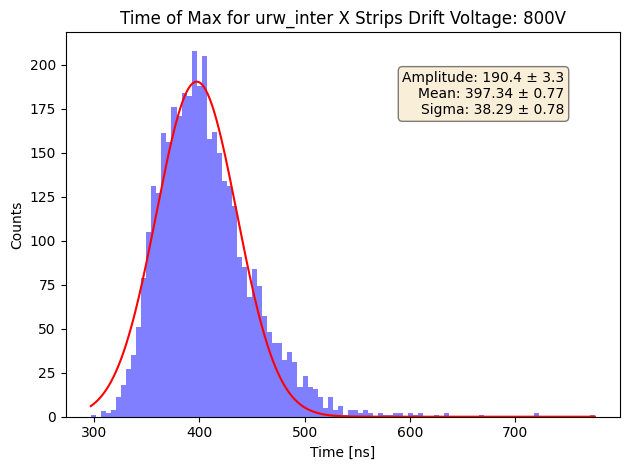

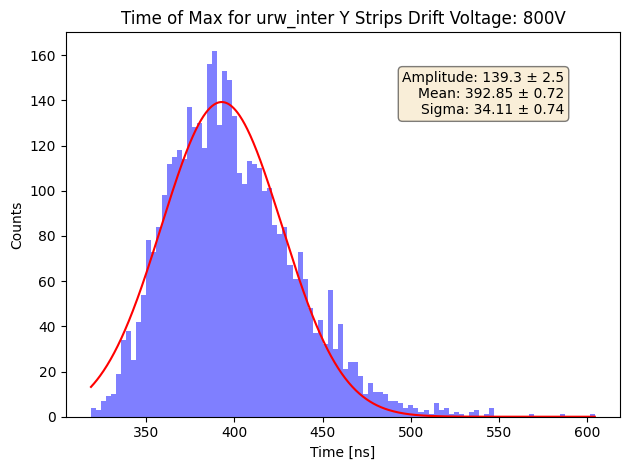

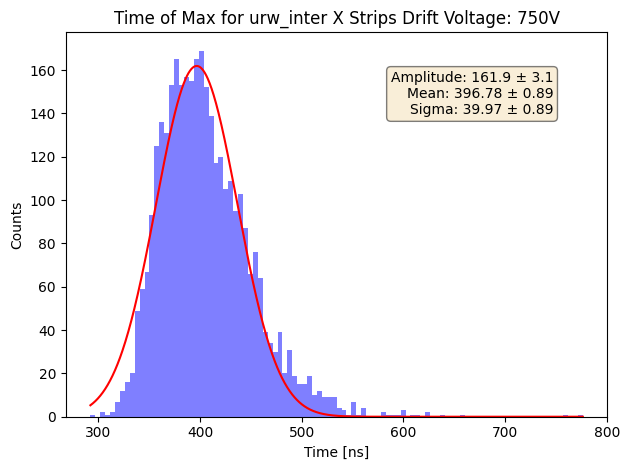

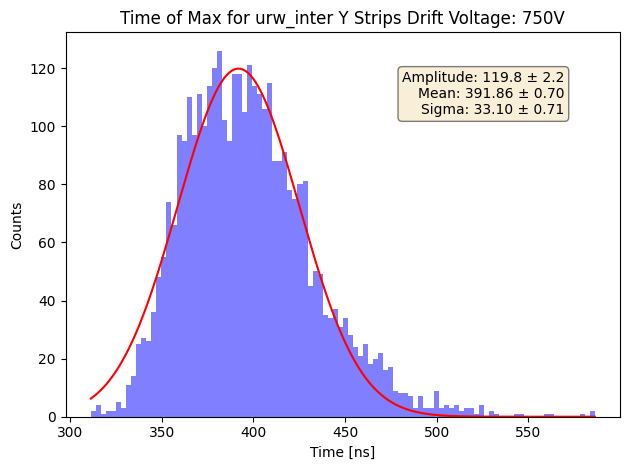

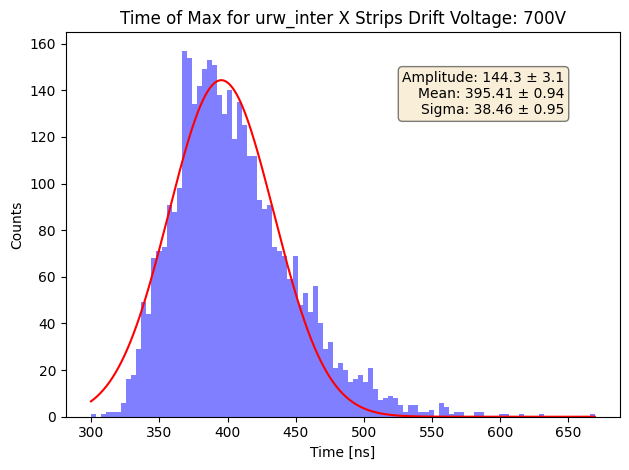

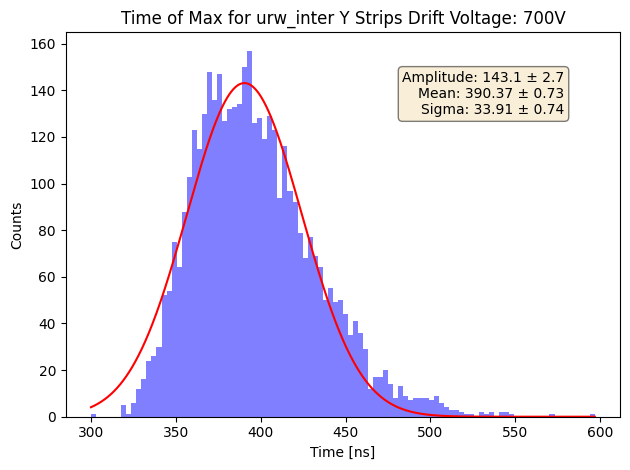

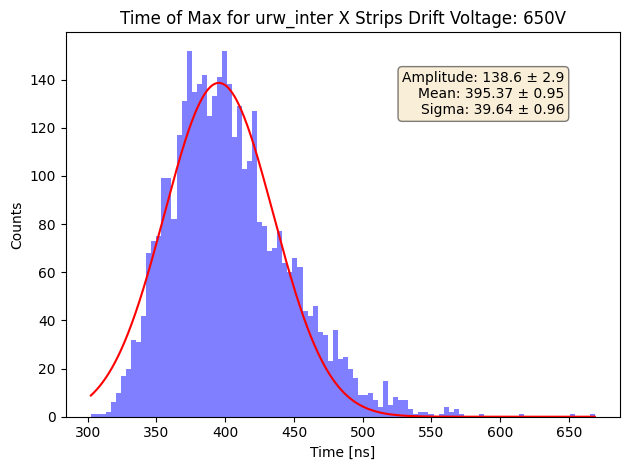

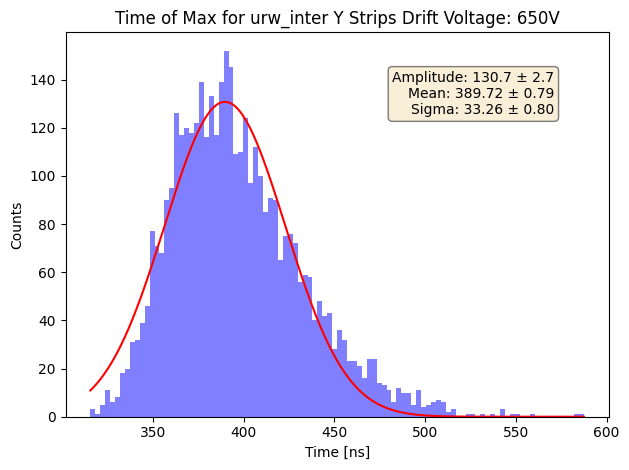

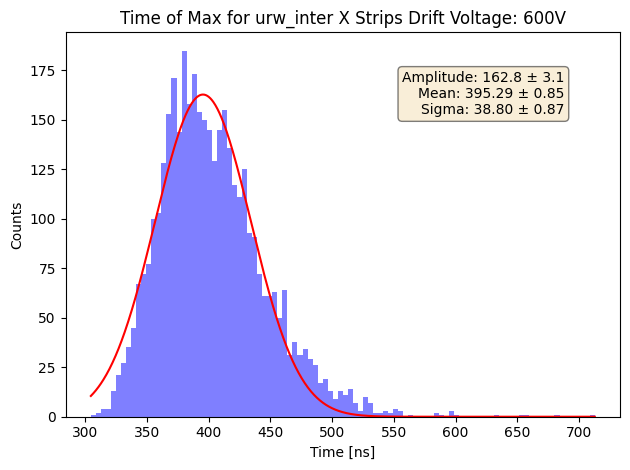

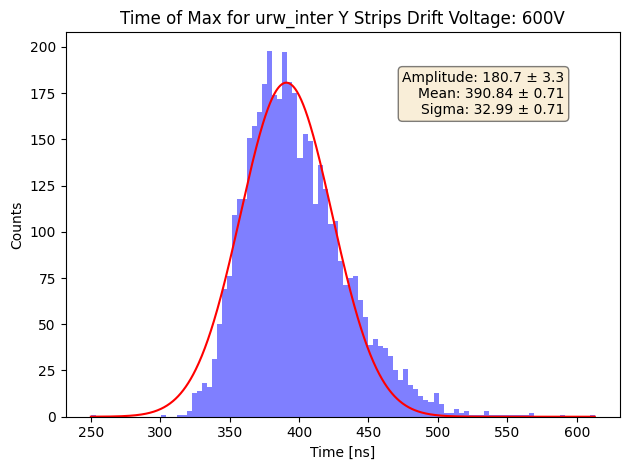

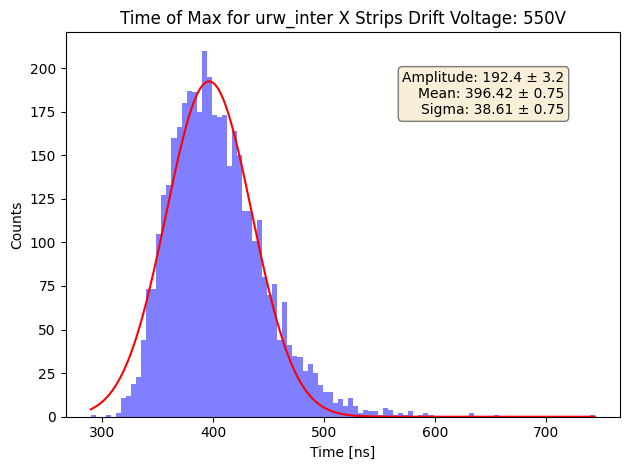

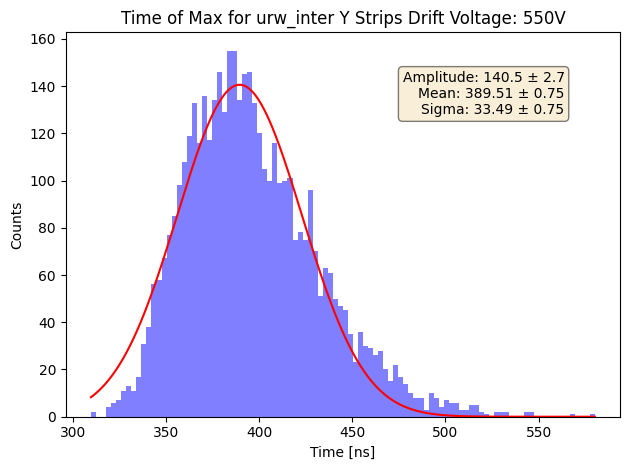

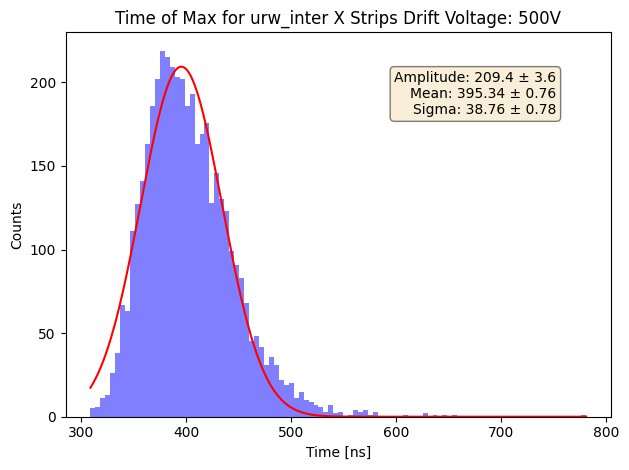

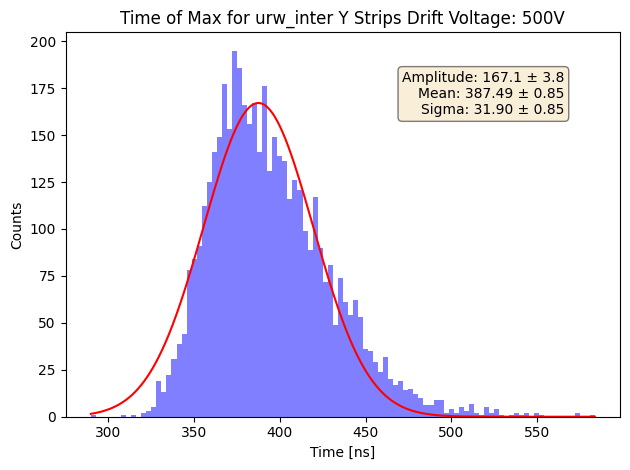

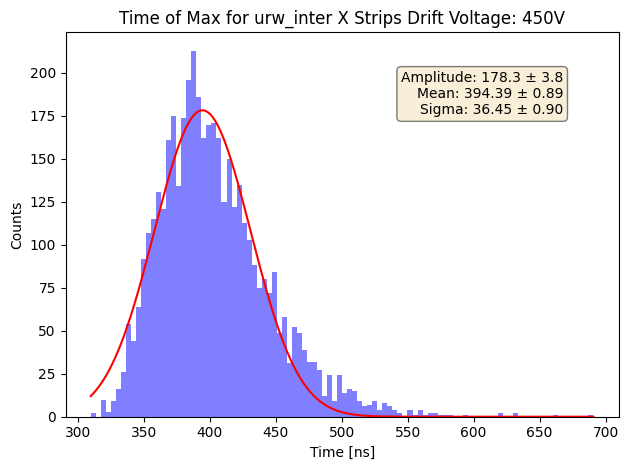

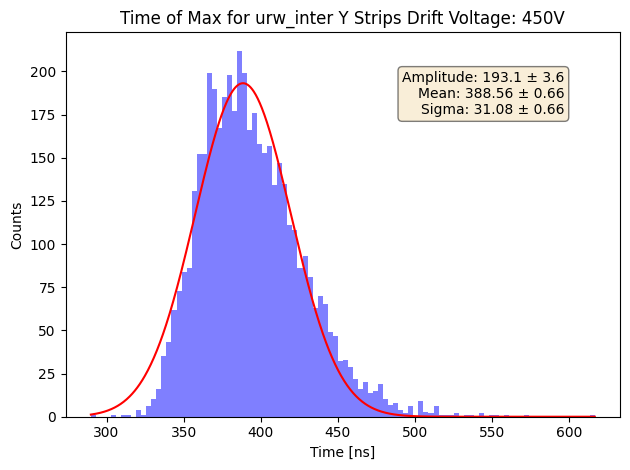

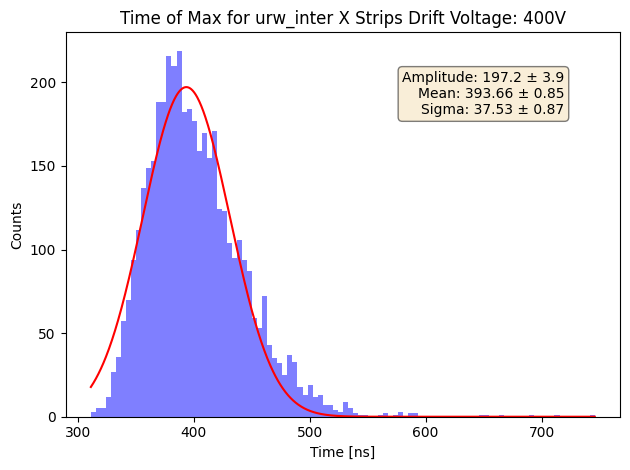

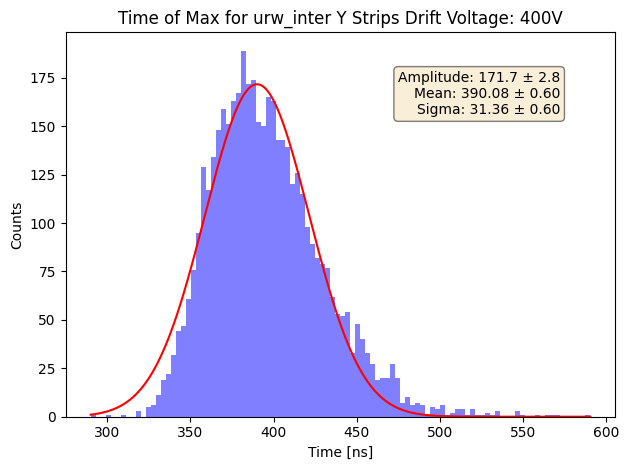

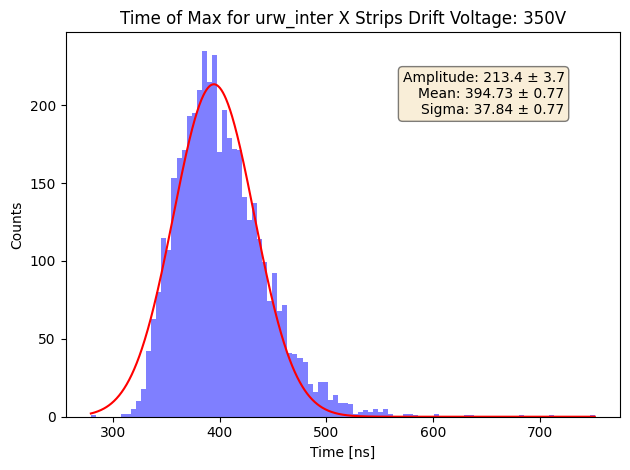

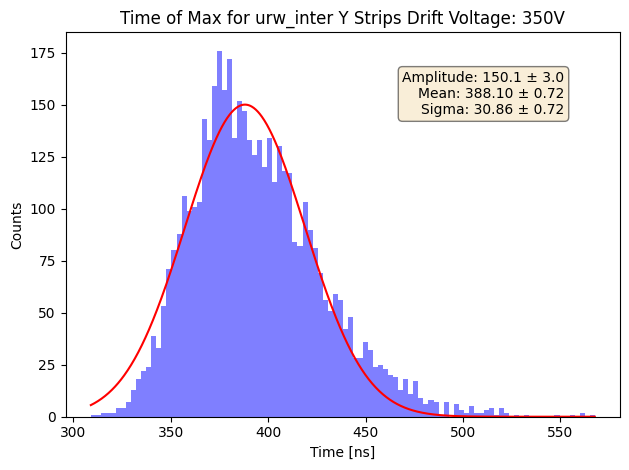

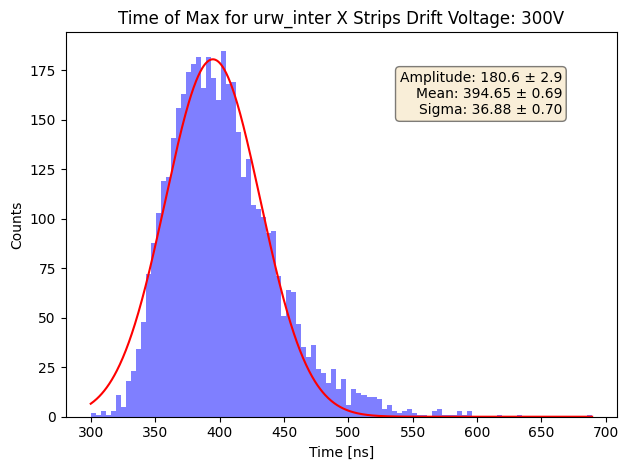

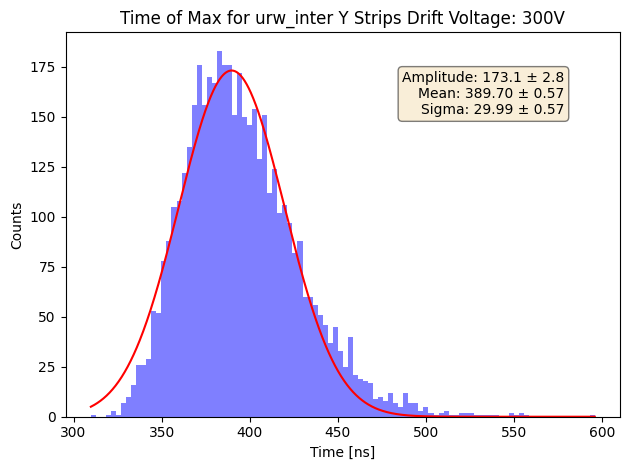

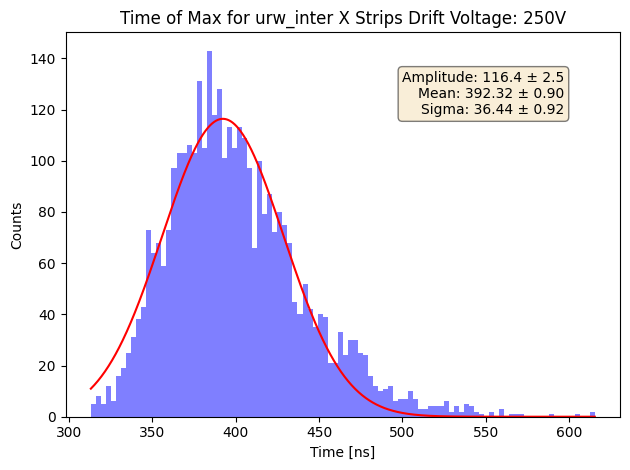

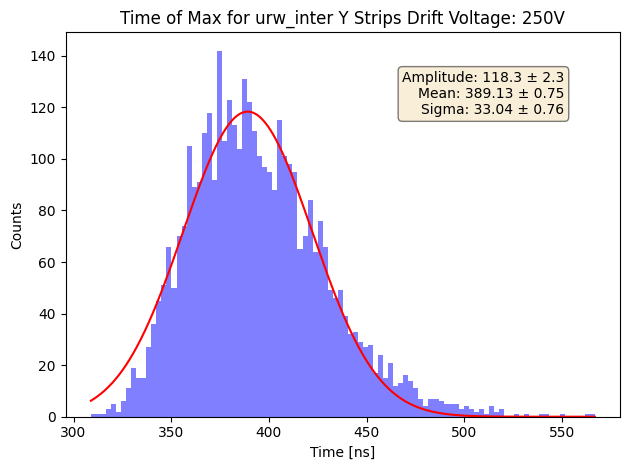

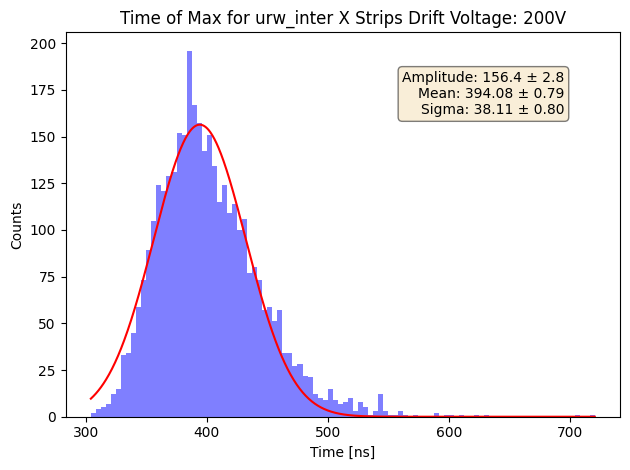

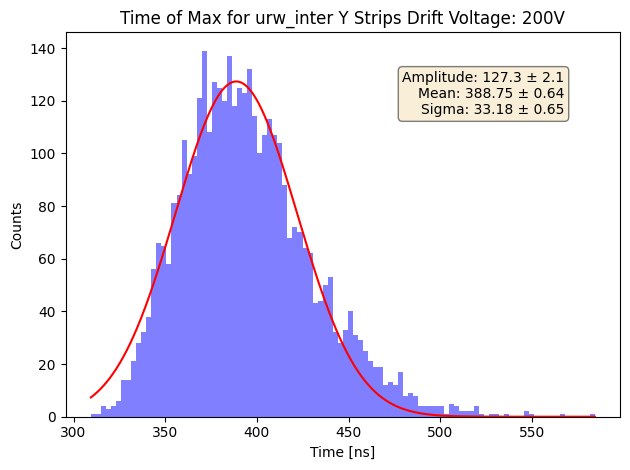

In [5]:
sigmas_x, sigma_x_errs = [], []
sigmas_y, sigma_y_errs = [], []
for v in drift_vs:
    sub_run_name = f'drift_{v}'
    data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
    ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
    det_config = det_config_loader.get_det_config(detector, sub_run_name=sub_run_name)
    det = DreamDetector(config=det_config)
    det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=False, waveform_fit_func='parabola_vectorized')
    det.dream_data.correct_for_fine_timestamps()
    
    sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, plot=True)
    plt.title(f'Time of Max for {detector} X Strips Drift Voltage: {v}V')
    sigmas_x.append(sigma_x)
    sigma_x_errs.append(sigma_x_err)
    
    sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, plot=True)
    plt.title(f'Time of Max for {detector} Y Strips Drift Voltage: {v}V')
    sigmas_y.append(sigma_y)
    sigma_y_errs.append(sigma_y_err)   
    

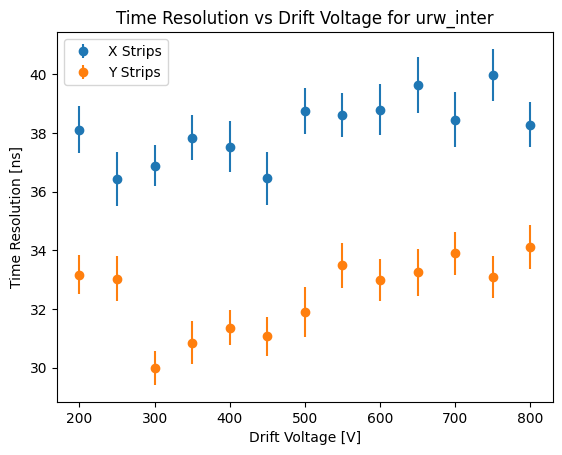

In [6]:
fig, ax = plt.subplots()
ax.errorbar(drift_vs, sigmas_x, yerr=sigma_x_errs, fmt='o', label='X Strips')
ax.errorbar(drift_vs, sigmas_y, yerr=sigma_y_errs, fmt='o', label='Y Strips')
ax.set_xlabel('Drift Voltage [V]')
ax.set_ylabel('Time Resolution [ns]')
ax.set_title(f'Time Resolution vs Drift Voltage for {detector}')
ax.legend()